In [2]:
import os
from pathlib import Path
from astropy.io import fits
import numpy as np

#pad naar de betreffende metingen, deze moet veranderd worden
path = "C:/Users/Arnau/Documents/NS Practicum 2/Zonnefysica Experiment/"
files =  [ p for p in Path(path).glob('*.fit') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file)

In [3]:
data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [4]:
data_dict['neon-0001.fit']

array([[ 992, 1055, 1034, ...,  730,  836,  313],
       [1068,  971,  967, ...,  756,  747,  342],
       [1015, 1030, 1043, ...,  738,  764,  331],
       ...,
       [ 992, 1063,  950, ...,  886,  914,  298],
       [1025, 1037, 1066, ...,  901,  899,  311],
       [1047, 1007, 1106, ...,  968,  935,  304]], dtype=uint16)

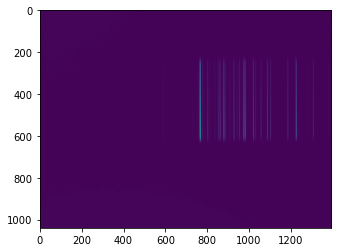

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(data_dict['neon-0001.fit'])

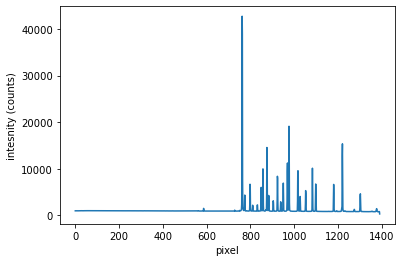

In [6]:
stack = np.median([x for x in data_dict.values()], axis=0)
spectrum = np.median(stack[0:700], axis=0)
#plt.xticks(range(0, 1500, 100))
plt.xlabel('pixel')
plt.ylabel('intesnity (counts)')
plt.plot(spectrum)
#plt.scatter(peaks, peak_prominences)

(700.0, 800.0)

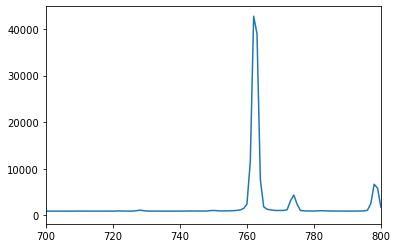

In [7]:
crop1 = np.median(spectrum[0:700], axis=0)
crop1

plt.plot(spectrum)
plt.xlim(700, 800)

In [8]:
#determining the minimal values
from scipy.signal import argrelextrema

maxima = argrelextrema(spectrum, np.greater)
len(maxima[0])

324

In [9]:
for i in maxima[0]:
    print(f'{i} : {spectrum[i]}')

1 : 987.0
12 : 984.0
15 : 987.5
23 : 998.0
28 : 999.5
31 : 1000.0
33 : 1001.5
37 : 999.5
39 : 1001.0
45 : 1005.0
47 : 1007.0
51 : 1005.0
54 : 1007.0
61 : 1005.0
65 : 1002.0
72 : 999.0
74 : 1002.0
77 : 995.0
79 : 999.0
85 : 994.5
87 : 996.5
89 : 997.0
91 : 995.0
95 : 996.0
97 : 995.0
100 : 1000.0
106 : 996.5
110 : 1007.0
114 : 1009.5
117 : 1006.0
121 : 998.0
124 : 999.0
126 : 996.0
128 : 992.5
130 : 994.0
132 : 994.5
135 : 994.0
141 : 1014.0
144 : 995.5
147 : 996.0
149 : 994.5
152 : 994.0
156 : 997.0
159 : 994.5
164 : 993.0
166 : 996.0
169 : 1027.5
174 : 1001.5
179 : 992.5
181 : 990.0
183 : 993.0
185 : 992.0
188 : 991.0
190 : 992.5
193 : 991.0
195 : 991.5
197 : 988.5
200 : 988.5
202 : 990.0
205 : 992.0
207 : 991.0
212 : 992.0
214 : 988.0
216 : 987.0
219 : 990.5
223 : 986.5
225 : 990.0
230 : 986.0
232 : 987.0
235 : 985.0
238 : 987.0
240 : 990.5
243 : 987.0
248 : 986.0
252 : 987.5
254 : 983.0
257 : 987.0
259 : 982.5
262 : 983.0
264 : 984.0
269 : 982.5
272 : 985.0
281 : 981.0
284 : 982.0
2

In [10]:
from scipy.signal import find_peaks, peak_prominences

peaks, _ = find_peaks(spectrum)
peaks

array([   1,    3,    6,   12,   15,   18,   23,   28,   31,   33,   37,
         39,   45,   47,   51,   54,   57,   61,   65,   68,   72,   74,
         77,   79,   85,   87,   89,   91,   95,   97,  100,  106,  110,
        114,  117,  121,  124,  126,  128,  130,  132,  135,  141,  144,
        147,  149,  152,  156,  159,  164,  166,  169,  174,  179,  181,
        183,  185,  188,  190,  193,  195,  197,  200,  202,  205,  207,
        212,  214,  216,  219,  223,  225,  230,  232,  235,  238,  240,
        243,  248,  252,  254,  257,  259,  262,  264,  269,  272,  277,
        281,  284,  286,  291,  296,  298,  303,  305,  307,  311,  316,
        321,  323,  325,  329,  337,  339,  341,  345,  348,  352,  356,
        360,  362,  367,  370,  374,  376,  378,  383,  387,  390,  392,
        395,  397,  399,  402,  404,  409,  411,  413,  417,  423,  426,
        430,  432,  436,  438,  444,  453,  455,  458,  461,  465,  467,
        469,  472,  475,  478,  482,  487,  490,  4

In [11]:
prominences = peak_prominences(spectrum, peaks)[0]
len(prominences)

336

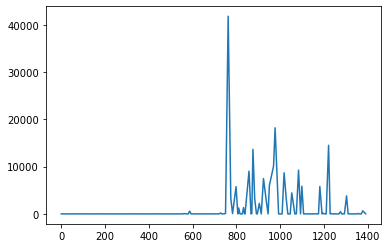

In [12]:
plt.plot(peaks, prominences)

In [13]:
filtered_peaks = []
filtered_pixel = []
n=0
k=0
for i in prominences:
    if i > k:
        k=i
        j = peaks[n]
        filtered_peaks.append(j)

    n+=1

k, j
#dit is eigenlijk om van het aantal counts naar de distributie te gaan (spectral irradiance)
# deze is waarschijnlij niet correct en dient veranderd te worden

(41827.5, 762)

In [14]:
#plt.plot()
#plt.xlabel("pixel number")
#plt.ylabel("intensity (counts)")

In [15]:
#dient verder aangepast te worden voor het vergelijken met de bekende neon-golflengtelijnen
#deze lijne zijn in een plaatje weergeven van de opdracht maandag maar is niet in een file gedaan.
# tips: niet alle punten hoeven in de fit voor de ijking, neem slechts een aantal golflengtes/pixel nums

#kan ook met zon & fraunhoverlijnen

neon_lambda_A = [5852.49, 6143.06, 6096.16, 6266.49, 6402.25, 6717.04, 7032.41, 7245.17]


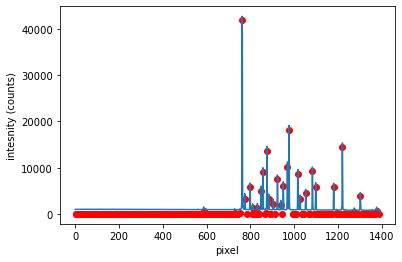

In [16]:
plt.xlabel('pixel')
plt.ylabel('intesnity (counts)')
plt.plot(spectrum)
plt.scatter(peaks, prominences, color="red")

In [17]:
peaks_new = []
prominences_new = []
n=0
for i in prominences:
    if i > 8000:
        prominences_new.append(i)
        peaks_new.append(peaks[n])
    n+=1

peaks_new
    

[762, 857, 875, 969, 976, 1017, 1083, 1220]

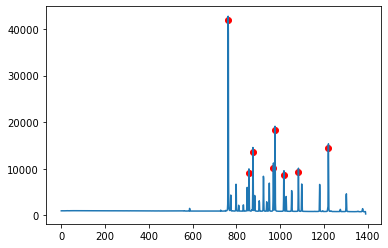

In [18]:
plt.scatter(peaks_new, prominences_new, color="red")
plt.plot(spectrum)

Text(0, 0.5, 'pixel number')

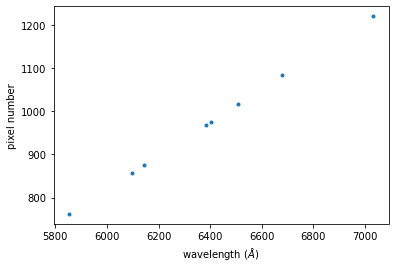

In [24]:
peaks_golf = [5852.49, 6096.16, 6143.06, 6382.99, 6402.25, 6506.53, 6678.28, 7032.41]
plt.plot(peaks_golf, peaks_new, '.')
plt.xlabel("wavelength ($\AA$)")
plt.ylabel("pixel number")

In [20]:
from lmfit import models
model = models.LinearModel()
fit = model.fit(peaks_golf, x=peaks_new)
fit

Text(0, 0.5, 'pixel number')

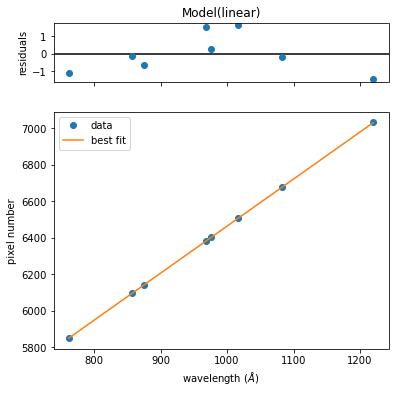

In [23]:
fit.plot()
plt.xlabel("wavelength ($\AA$)")
plt.ylabel("pixel number")

In [22]:
def pixels_to_wavelenghts(pixel, slope, intercept):
    '''
    This function converts pixel values to wavelengths using a linear model to be determined by a fit.
    '''
    return slope * pixel + intercept

wavelengths = pixels_to_wavelenghts(range(len(spectrum)), fit.values['slope'], fit.values['intercept'])
wavelengths

array([3888.85008086, 3891.42558922, 3894.00109758, ..., 7463.65568239,
       7466.23119075, 7468.8066991 ])